In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('data/titanic_clean.csv')

In [3]:
titanic.head()

,Passengerid,Pclass,Survived,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,1,female,29.0000,0,0,24160,211.3375,B5,S
1,2,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S
2,3,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S
3,4,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S
4,5,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S


## Exploratory Data Analysis

In [4]:
titanic.isna().sum()

Passengerid       0
Pclass            0
Survived          0
Sex               0
Age             263
Sibsp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [5]:
titanic.corr()

,Passengerid,Pclass,Survived,Age,Sibsp,Parch,Fare
Passengerid,1.000000,0.897822,-0.293717,-0.343888,0.065594,0.003584,-0.481215
Pclass,0.897822,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629
Survived,-0.293717,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265
Age,-0.343888,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739
Sibsp,0.065594,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238
Parch,0.003584,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539
Fare,-0.481215,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000


In [6]:
titanic.describe()

,Passengerid,Pclass,Survived,Age,Sibsp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,378.020061,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,328.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Survived     1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   Sibsp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 112.6+ KB


In [8]:
#upper_outlier = train_df.Fare.quantile(0.95)
#train_data = train_df[train_df.Fare < upper_outlier].copy()

## Handling missing values for age and fare

In [9]:
titanic.Age.fillna(titanic.groupby(['Pclass']).Age.transform('mean'), inplace = True)

In [10]:
sum(titanic.Age.isna())

0

In [11]:
titanic.Fare.fillna(titanic.groupby(['Pclass']).Fare.transform('mean'), inplace = True)

In [12]:
sum(titanic.Fare.isna())

0

## Handling missing values in Cabin-column by dropping the whole column

In [13]:
titanic.drop(columns=['Cabin'], inplace = True)

## Feature engineering

# Training the model

In [40]:
y = titanic['Survived'].values.reshape(-1,1)
dummies = pd.get_dummies(titanic[['Pclass', 'Sex', 'Embarked']], drop_first=True)
X = pd.concat([dummies, titanic[['Age', 'Fare', 'Sibsp', 'Parch']]], axis=1).values

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((916, 8), (393, 8), (916, 1), (393, 1))

In [44]:
from logistic_regression import LogisticRegression

In [45]:
model = LogisticRegression()

The cost at iteration 0 is 0.6491319837537984
The cost at iteration 1000 is 0.5722172042577844
The cost at iteration 2000 is 0.5529886176624551
The cost at iteration 3000 is 0.5393630117346608
The cost at iteration 4000 is 0.5290379590346848
The cost at iteration 5000 is 0.521047724979862
The cost at iteration 6000 is 0.5147714847227851
The cost at iteration 7000 is 0.5097774837519278
The cost at iteration 8000 is 0.5057548547004673
The cost at iteration 9000 is 0.5024751954012104
The cost at iteration 10000 is 0.4997684699585515
The cost at iteration 11000 is 0.49750687102703384
The cost at iteration 12000 is 0.49559357992387965
The cost at iteration 13000 is 0.4939547509674144
The cost at iteration 14000 is 0.4925337082509149
The cost at iteration 15000 is 0.4912866990563213
The cost at iteration 16000 is 0.49017976001476954
The cost at iteration 17000 is 0.4891863875586179
The cost at iteration 18000 is 0.4882857947546958
The cost at iteration 19000 is 0.48746159881764195
The cost a

The cost at iteration 163000 is 0.46296738043251656
The cost at iteration 164000 is 0.46294516249858525
The cost at iteration 165000 is 0.46292341003353954
The cost at iteration 166000 is 0.4629021130388275
The cost at iteration 167000 is 0.46288126173764016
The cost at iteration 168000 is 0.4628608465698027
The cost at iteration 169000 is 0.4628408581867904
The cost at iteration 170000 is 0.46282128744686235
The cost at iteration 171000 is 0.46280212541031274
The cost at iteration 172000 is 0.46278336333483516
The cost at iteration 173000 is 0.46276499267099797
The cost at iteration 174000 is 0.4627470050578275
The cost at iteration 175000 is 0.46272939231849686
The cost at iteration 176000 is 0.46271214645611725
The cost at iteration 177000 is 0.46269525964962965
The cost at iteration 178000 is 0.4626787242497938
The cost at iteration 179000 is 0.46266253277527314
The cost at iteration 180000 is 0.4626466779088124
The cost at iteration 181000 is 0.4626311524935052
The cost at iterati

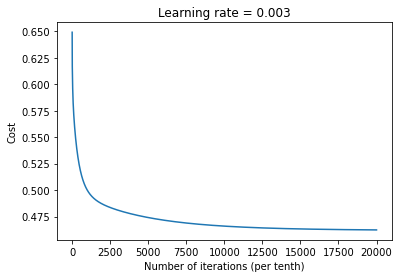

In [64]:
model.fit(X_train, y_train, num_iterations=200000, learning_rate=0.003)

In [65]:
predictions = model.predict(X_test)

In [66]:
score = model.score(y_test, predictions)
score

80.1526717557252

## Comparing my model with a simple model that predicts survival for  all females and non-survival for all males

In [67]:
base_rate_sex_model = titanic.Sex.map({'male':0, 'female':1})

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
base_model_accuracy = accuracy_score(titanic.Survived, base_rate_sex_model)
base_model_accuracy

0.7799847211611918

In [70]:
score > base_model_accuracy

True